# matplotlib 

The most common python plotting library is matplotlib. Matplotlib provides an advanced
object-oriented interface and a Matlab-like interface called **pyplot**

You can see some examples of it in action at
https://matplotlib.org/gallery.html

## matplotlib inline

Matplotlib can interact with Jupyter in two different ways; "inline" and "notebook".  "Inline" mode writes static images directly into the output cell.
"notebook" mode creates an interactive output that the user can resize and zoom.

Changing between the two modes is problematic and therefore discouraged.  Best practice is to declare one at the beginning of your notebook using the appropriate line magic.  For example,

``` python
%matplotlib inline
import matplotlib.pyplot as plt
```


In [3]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [4]:
import matplotlib
matplotlib.pyplot.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Simple Example

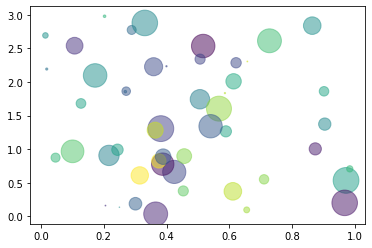

In [5]:
# generate some data
N = 50
xp = np.random.rand(N)
yp = 3*np.random.rand(N)
colors = np.random.rand(N)
radii = 15 * np.random.rand(N)
area = np.pi * radii**2  # 0 to 15 point radiuses

# plot the data
plt.figure()
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5)

# call show
plt.show()

## Controlling the Plot Size

Depending on your monitor, the plot may be hard to see.  You can specify a plot size in inches, and a DPI (dots-per-inch).

First, lets take a look at the defaults:

In [6]:
fig = plt.gcf();
dpi = fig.get_dpi();
size = fig.get_size_inches();
print("Default Size: %s.   Default DPI: %s" % (size, dpi))

Default Size: [6. 4.].   Default DPI: 72.0


<Figure size 432x288 with 0 Axes>

Now, to make the image larger on the screen, we can either increase the DPI or the size.

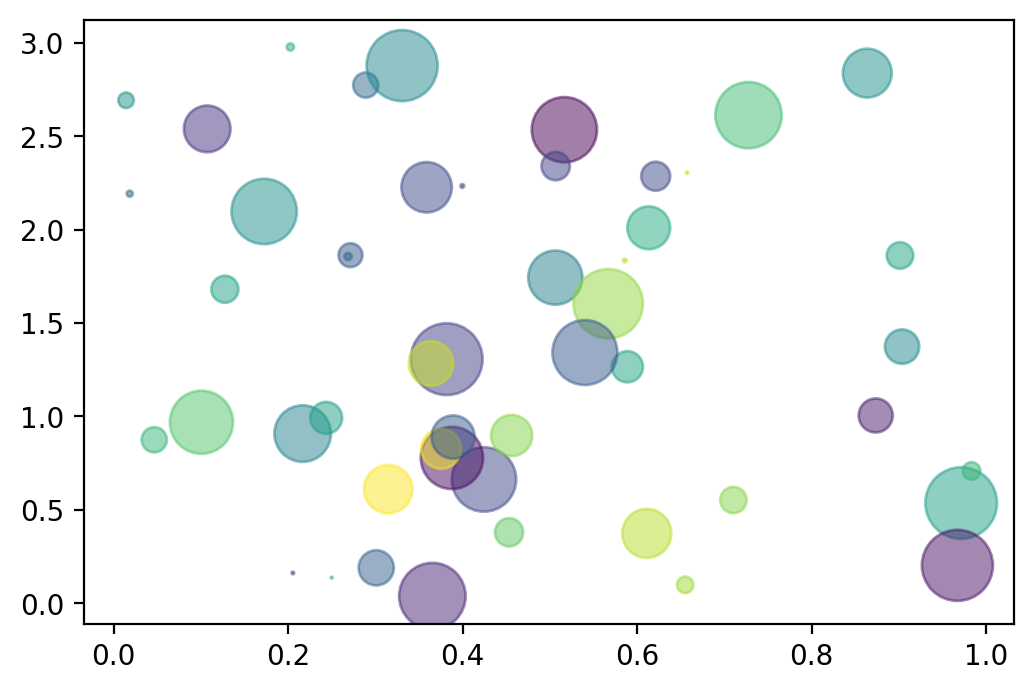

In [7]:
plt.figure(dpi=200)
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5)
plt.show()

You can set both the size and DPI at once.  Notice that setting the size also sets the aspect ratio.

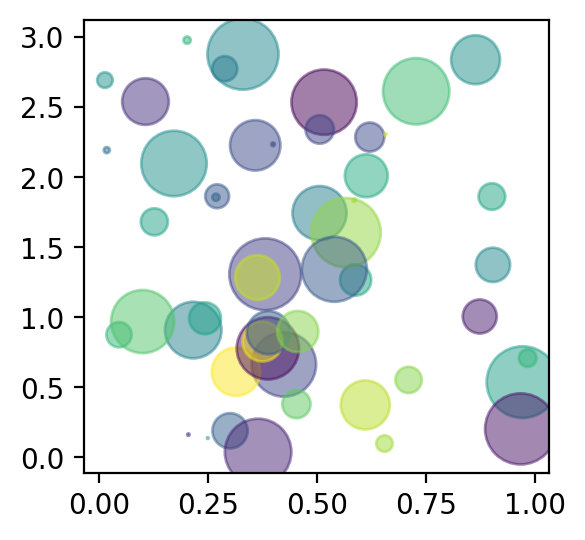

In [8]:
plt.figure(figsize=(3,3), dpi=200)
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5)
plt.show()

You can still adjust the aspect ratio later.

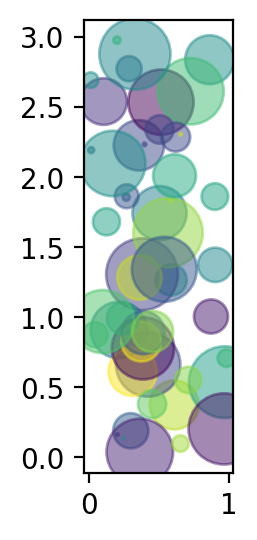

In [9]:
plt.figure(figsize=(3,3), dpi=200)
plt.axes().set_aspect('equal')
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5)
plt.show()

## Resizing Static Plots

The plots you create using "inline" are static and are stored in the output and will be saved with the notebook.  However, output is resized when possible as the browser window is resized.  Give it a try...

## Interactive Use

In [10]:
from ipywidgets import interact

x = np.linspace(0,10,200)

def plot_sine(A, B):
    y = np.sin(A*x+B)
    plt.plot(x,y,linewidth=2)
    plt.show()

interact(plot_sine, A=(1, 10), B=(0,10));

interactive(children=(IntSlider(value=5, description='A', max=10, min=1), IntSlider(value=5, description='B', …

## Animation

Animation using matplotlib requires use of matplotlib.animation.  You should check the examples in the matplotlib docs.

/apps/share64/debian10/anaconda/anaconda-6/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.


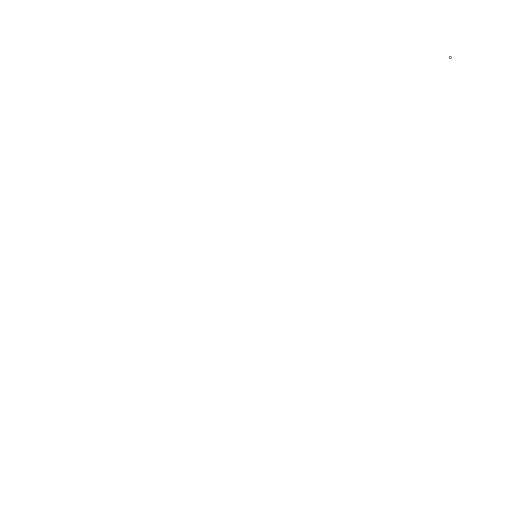

In [11]:
# from the Matplotlib docs:
# https://matplotlib.org/gallery/animation/rain.html

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation director.
animation = FuncAnimation(fig, update, interval=10)

In [12]:
HTML(animation.to_html5_video())